In [145]:
# Import Dependencies
import sqlalchemy
from sqlalchemy import create_engine

In [146]:
# Connect to DB
login = 'postgres:postgres'
db_url = 'postgresql://' + login + '@localhost:5432/Bitcoin_Nasdaq'
engine = create_engine(db_url)
connection = engine.connect()

In [147]:
# Reflect DB into a new model
from sqlalchemy.ext.automap import automap_base
Base = automap_base()

# Show tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['nasdaqs', 'bitcoin']

In [148]:
# Save references to each table
Bitcoin = Base.classes.bitcoin
Nasdaqs = Base.classes.nasdaqs

In [149]:
# Create link to SQL DB
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
session = Session(engine)
inspector = inspect(engine)

In [150]:
# Inspector
columns = inspector.get_columns('bitcoin')
for column in columns:
        print(column["name"], column["type"])

date DATE
opening_price NUMERIC
high NUMERIC
low NUMERIC
closing_price NUMERIC


In [151]:
# Inspector
columns = inspector.get_columns('nasdaqs')
for column in columns:
        print(column["name"], column["type"])

date DATE
opening_price NUMERIC
high NUMERIC
low NUMERIC
closing_price NUMERIC
adj_closing NUMERIC
volume BIGINT


In [152]:
# Session
for row in session.query(Bitcoin).limit(10).all():
        print(row.date)

2013-09-30
2013-10-01
2013-10-02
2013-10-03
2013-10-04
2013-10-05
2013-10-06
2013-10-07
2013-10-08
2013-10-09


In [153]:
# Session
for row in session.query(Nasdaqs).limit(10).all():
        print(row.date)

1971-02-05
1971-02-08
1971-02-09
1971-02-10
1971-02-11
1971-02-12
1971-02-16
1971-02-17
1971-02-18
1971-02-19


In [154]:
# Query to retrieve the last 12 months of precipitation data and plot the results
last_date_year= session.query(Bitcoin.date).order_by(Bitcoin.date.desc()).first()
print(last_date_year)

(datetime.date(2021, 2, 4),)


In [155]:
# Calculate the date 1 year ago from the last data point in the database
import datetime as dt
year_ago = dt.date(2021, 2, 4) - dt.timedelta(days=365)
print(year_ago)

2020-02-05


In [156]:
# Perform a query to retrieve the prices
bit_prices = session.query(Bitcoin.date,Bitcoin.closing_price).filter(Bitcoin.date <= dt.date(2021, 2, 4),Bitcoin.date >= dt.date(2020, 2, 5)).all()
print(bit_prices)

[(datetime.date(2020, 2, 5), Decimal('9625.456637')), (datetime.date(2020, 2, 6), Decimal('9681.377411')), (datetime.date(2020, 2, 7), Decimal('9795.344066')), (datetime.date(2020, 2, 8), Decimal('9927.778256')), (datetime.date(2020, 2, 9), Decimal('10132.7065')), (datetime.date(2020, 2, 10), Decimal('9838.900016')), (datetime.date(2020, 2, 11), Decimal('10236.63515')), (datetime.date(2020, 2, 12), Decimal('10364.92629')), (datetime.date(2020, 2, 13), Decimal('10218.09974')), (datetime.date(2020, 2, 14), Decimal('10367.528')), (datetime.date(2020, 2, 15), Decimal('9926.353691')), (datetime.date(2020, 2, 16), Decimal('9876.234963')), (datetime.date(2020, 2, 17), Decimal('9636.624095')), (datetime.date(2020, 2, 18), Decimal('10189.99598')), (datetime.date(2020, 2, 19), Decimal('9701.037191')), (datetime.date(2020, 2, 20), Decimal('9631.484946')), (datetime.date(2020, 2, 21), Decimal('9670.858654')), (datetime.date(2020, 2, 22), Decimal('9689.086743')), (datetime.date(2020, 2, 23), Decima

In [157]:
# Save results in DF
import pandas as pd
bit_prices_df= pd.DataFrame(bit_prices)
bit_prices_df.set_index("date", inplace=True)
bit_prices_df.head()
bit= bit_prices_df.rename(columns={'closing_price': 'Bitcoin'})
bit

,Bitcoin
date,
2020-02-05,9625.456637
2020-02-06,9681.377411
2020-02-07,9795.344066
2020-02-08,9927.778256
2020-02-09,10132.7065
...,...
2021-01-31,33087.36986
2021-02-01,33613.32076
2021-02-02,35632.90195


In [158]:
# Use same dates for Nasdaq
ndaq_prices = session.query(Nasdaqs.date,Nasdaqs.closing_price).filter(Nasdaqs.date <= dt.date(2021, 2, 4),Nasdaqs.date >= dt.date(2020, 2, 5)).all()
print(ndaq_prices)

[(datetime.date(2020, 2, 5), Decimal('9508.679688')), (datetime.date(2020, 2, 6), Decimal('9572.150391')), (datetime.date(2020, 2, 7), Decimal('9520.509766')), (datetime.date(2020, 2, 10), Decimal('9628.389648')), (datetime.date(2020, 2, 11), Decimal('9638.94043')), (datetime.date(2020, 2, 12), Decimal('9725.959961')), (datetime.date(2020, 2, 13), Decimal('9711.969727')), (datetime.date(2020, 2, 14), Decimal('9731.179688')), (datetime.date(2020, 2, 18), Decimal('9732.740234')), (datetime.date(2020, 2, 19), Decimal('9817.179688')), (datetime.date(2020, 2, 20), Decimal('9750.969727')), (datetime.date(2020, 2, 21), Decimal('9576.589844')), (datetime.date(2020, 2, 24), Decimal('9221.280273')), (datetime.date(2020, 2, 25), Decimal('8965.610352')), (datetime.date(2020, 2, 26), Decimal('8980.780273')), (datetime.date(2020, 2, 27), Decimal('8566.480469')), (datetime.date(2020, 2, 28), Decimal('8567.370117')), (datetime.date(2020, 3, 2), Decimal('8952.169922')), (datetime.date(2020, 3, 3), Deci

In [159]:
# Save results in DF
ndaq_prices_df= pd.DataFrame(ndaq_prices)
ndaq_prices_df.head()
ndaq_prices_df.set_index("date", inplace=True)
ndaq= ndaq_prices_df.rename(columns={'closing_price': 'NDAQ'})

In [160]:
# Calculate summary statistics for NDAQ
ndaq.describe()

,NDAQ
count,249
unique,249
top,10550.49023
freq,1


In [161]:
# Calculate the summary statistics for Bitcoin
bit.describe()

,Bitcoin
count,366
unique,366
top,7875.750875
freq,1


In [162]:
# Bitcoin- Mean, Median, Max, Min between 2020-2021
mean_bit = bit.mean()
mean_bit

Bitcoin    13649.986839
dtype: float64

In [163]:
median_bit = bit.median()
median_bit

Bitcoin    10481.28415
dtype: float64

In [164]:
max_bit = bit.max()
max_bit

Bitcoin    40519.4486
dtype: float64

In [165]:
min_bit = bit.min()
min_bit

Bitcoin    4944.702336
dtype: float64

In [166]:
# Nasdaq- Mean, Median, Max, Min between 2020-2021
mean_ndaq = ndaq.mean()
mean_ndaq

NDAQ    10517.609269
dtype: float64

In [167]:
median_ndaq = ndaq.median()
median_ndaq

NDAQ    10745.26953
dtype: float64

In [168]:
max_ndaq = ndaq.max()
max_ndaq

NDAQ    13635.99023
dtype: float64

In [169]:
min_ndaq = ndaq.min()
min_ndaq

NDAQ    6860.669922
dtype: float64

In [205]:
# Import Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [206]:
# Merge DF
merged_df= pd.merge(bit, ndaq, how="outer",on='date')
merged_df.dropna()

,Bitcoin,NDAQ
date,,
2020-02-05,9625.456637,9508.679688
2020-02-06,9681.377411,9572.150391
2020-02-07,9795.344066,9520.509766
2020-02-10,9838.900016,9628.389648
2020-02-11,10236.63515,9638.94043
...,...,...
2021-01-25,32500.25596,13635.99023
2021-01-26,32324.55565,13626.05957
2021-01-27,30534.99937,13270.59961


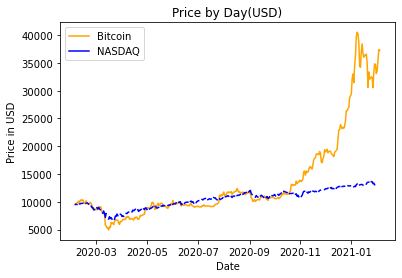

In [210]:
# Plot line graph with both

merged_df=merged_df.astype(float)
ax1 = merged_df.plot(y='Bitcoin', kind="line", color="orange", label="Bitcoin", title="Price by Day(USD)")
merged_df.plot(y='NDAQ', kind="line", color="blue", label="NASDAQ", ax=ax1)

# Plot labels
ax1.set_xlabel("Date")
ax1.set_ylabel("Price in USD")

# Plot the legend
ax1.legend(loc="best")

# Display graph
plt.savefig("BitcoinNDAQ.png")
plt.show()
